# Ad Spend Optimization 

<>:35: SyntaxWarning: invalid escape sequence '\$'
<>:35: SyntaxWarning: invalid escape sequence '\$'
C:\Users\milto\AppData\Local\Temp\ipykernel_5544\2790160318.py:35: SyntaxWarning: invalid escape sequence '\$'
  df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)



--- Initial Exploration of the Dataset ---

First 5 rows of the dataset:
   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0             0.15          $500.00  5.790000    Las Vegas  Spanish     500   
1             0.01          $500.00  7.210000  Los Angeles   French     500   
2             0.08          $500.00  0.430000       Austin  Spanish     500   
3             0.03          $500.00  0.909824        Miami  Spanish     293   
4             0.13          $500.00  1.422828       Austin   French     293   

   Imp

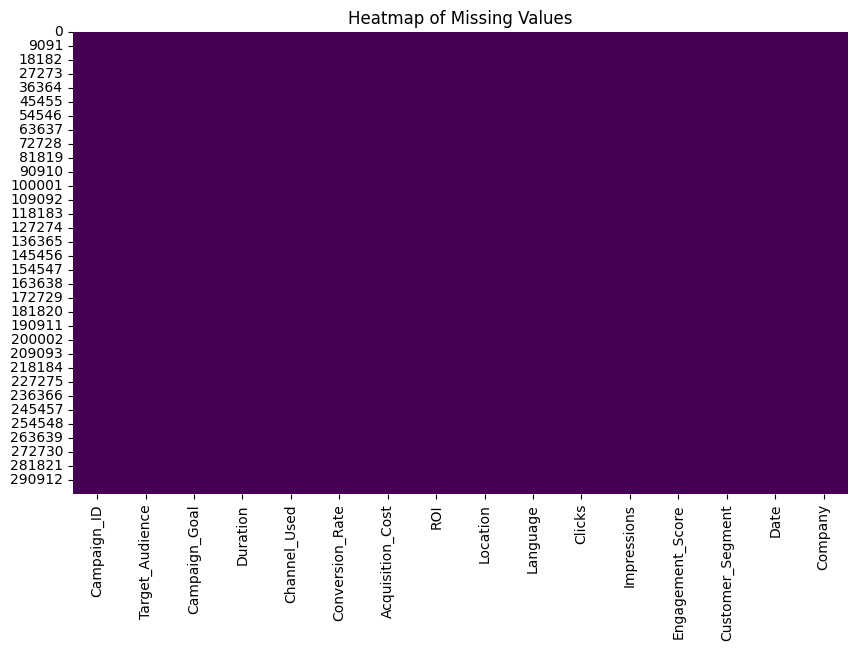


--- Data Type and Consistency Check ---

Updated Data Types:
Campaign_ID            int64
Target_Audience     category
Campaign_Goal       category
Duration            category
Channel_Used        category
Conversion_Rate      float64
Acquisition_Cost     float64
ROI                  float64
Location            category
Language            category
Clicks                 int64
Impressions            int64
Engagement_Score       int64
Customer_Segment    category
Date                  object
Company               object
dtype: object

--- Duplicate Data Check ---
Number of duplicate rows found: 0

--- Outlier Detection ---
Number of potential outliers in 'Campaign_ID': 0
Number of potential outliers in 'Conversion_Rate': 0
Number of potential outliers in 'Acquisition_Cost': 0
Number of potential outliers in 'ROI': 0
Number of potential outliers in 'Clicks': 0
Number of potential outliers in 'Impressions': 0
Number of potential outliers in 'Engagement_Score': 0

--- Correlation Analysis

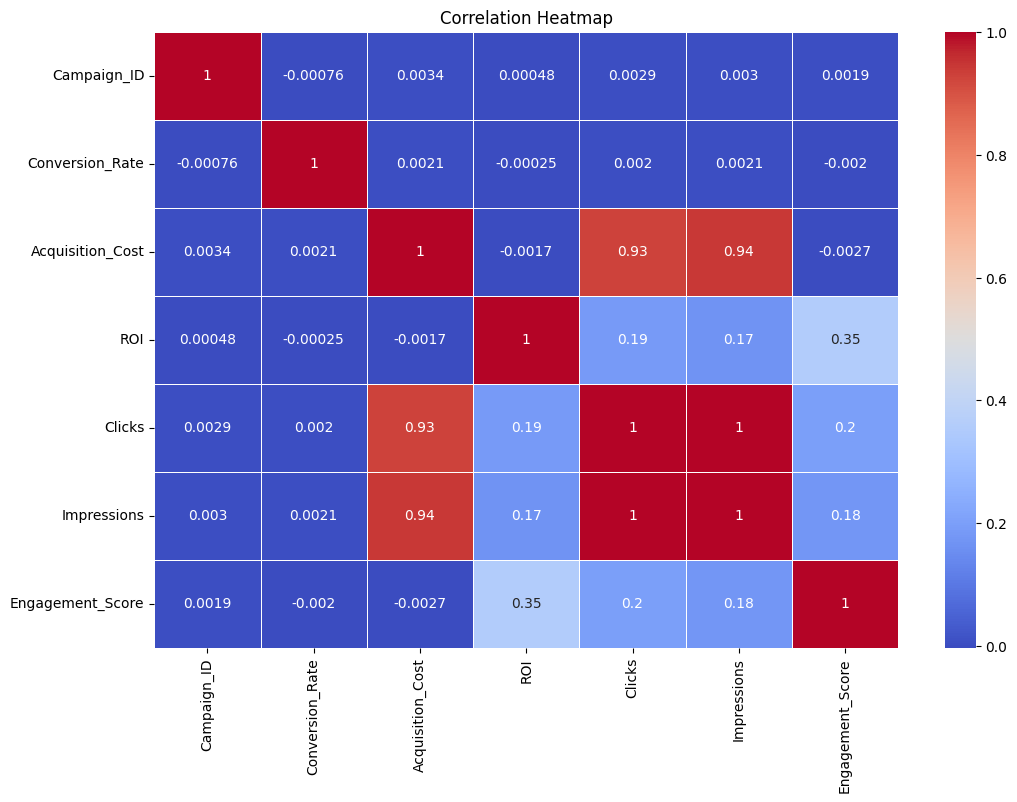


--- Summary of Findings ---
Highly Correlated Features:
                  Campaign_ID  Conversion_Rate  Acquisition_Cost  ROI  \
Campaign_ID               1.0              NaN               NaN  NaN   
Conversion_Rate           NaN              1.0               NaN  NaN   
Acquisition_Cost          NaN              NaN          1.000000  NaN   
ROI                       NaN              NaN               NaN  1.0   
Clicks                    NaN              NaN          0.925816  NaN   
Impressions               NaN              NaN          0.943342  NaN   
Engagement_Score          NaN              NaN               NaN  NaN   

                    Clicks  Impressions  Engagement_Score  
Campaign_ID            NaN          NaN               NaN  
Conversion_Rate        NaN          NaN               NaN  
Acquisition_Cost  0.925816     0.943342               NaN  
ROI                    NaN          NaN               NaN  
Clicks            1.000000     0.998769               NaN 

In [7]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the zip file path
zip_file_path = 'Social Media Advertising.zip'

# Step 1: Extract the dataset from zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
    extracted_files = zip_ref.namelist()

csv_file_name = extracted_files[0]

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Step 1: Initial Exploration of the Dataset
print("\n--- Initial Exploration of the Dataset ---")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics for Numerical Features:")
print(df.describe())
print("\nSummary for Categorical Features:")
print(df.describe(include='object'))

# Step 2: Clean Currency Columns
print("\n--- Cleaning Currency Columns ---")
# Convert "Acquisition_Cost" from a string with "$" to a float
if 'Acquisition_Cost' in df.columns:
    df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

print("\nUpdated Acquisition_Cost column:")
print(df['Acquisition_Cost'].head())

# Step 2: Identify Missing Values
print("\n--- Missing Values Analysis ---")
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(missing_columns)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Step 3: Data Type and Consistency Check
print("\n--- Data Type and Consistency Check ---")
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values < 50:
        df[col] = df[col].astype('category')

print("\nUpdated Data Types:")
print(df.dtypes)

# Fill missing values
for col in missing_columns.index:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n--- Duplicate Data Check ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates} duplicates have been removed.")

# Step 6: Outlier Detection
print("\n--- Outlier Detection ---")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    num_outliers = len(outliers)
    print(f"Number of potential outliers in '{col}': {num_outliers}")

# Step 8: Correlation Analysis
print("\n--- Correlation Analysis ---")
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Summary of Findings
print("\n--- Summary of Findings ---")
high_corr_features = corr_matrix[corr_matrix.abs() > 0.7]
print("Highly Correlated Features:")
print(high_corr_features)


In [ ]:
# Data Preparation

In [23]:
print("\n--- Post-Merge Missing Values Analysis ---")
post_merge_missing_values = df.isnull().sum()
post_merge_missing_columns = post_merge_missing_values[post_merge_missing_values > 0]
if post_merge_missing_columns.empty:
    print("No missing values found in the dataset after merging.")
else:
    print("Columns with Missing Values After Merging:")
    print(post_merge_missing_columns)


--- Post-Merge Missing Values Analysis ---
No missing values found in the dataset after merging.


In [25]:
print("\n--- Dataset Overview After Merge ---")
print(df.info())
print(df.head())


--- Dataset Overview After Merge ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Campaign_ID       300000 non-null  int64   
 1   Target_Audience   300000 non-null  category
 2   Campaign_Goal     300000 non-null  category
 3   Duration          300000 non-null  category
 4   Channel_Used      300000 non-null  category
 5   Conversion_Rate   300000 non-null  float64 
 6   Acquisition_Cost  300000 non-null  float64 
 7   ROI               300000 non-null  float64 
 8   Location          300000 non-null  category
 9   Language          300000 non-null  category
 10  Clicks            300000 non-null  int64   
 11  Impressions       300000 non-null  int64   
 12  Engagement_Score  300000 non-null  int64   
 13  Customer_Segment  300000 non-null  category
 14  Date              300000 non-null  object  
 15  Company      

In [27]:
if not post_merge_missing_columns.empty:
    print("\n--- Handling Remaining Missing Values ---")
    for col in post_merge_missing_columns.index:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    print("Remaining missing values have been handled.")

In [29]:
print("\n--- Post-Merge Duplicate Data Check ---")
duplicates_after_merge = df.duplicated().sum()
print(f"Number of duplicate rows found after merging: {duplicates_after_merge}")
if duplicates_after_merge > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicates_after_merge} duplicates have been removed.")


--- Post-Merge Duplicate Data Check ---
Number of duplicate rows found after merging: 0


In [31]:
print("\n--- Final Data Verification Before Feature Engineering ---")

# Verify data types
print("\nData Types:")
print(df.dtypes)

# Verify missing values
print("\nMissing Values Summary:")
missing_values_final = df.isnull().sum()
print(missing_values_final[missing_values_final > 0])

# Verify basic statistics
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Final dataset shape
print("\nFinal Dataset Shape:", df.shape)


--- Final Data Verification Before Feature Engineering ---

Data Types:
Campaign_ID            int64
Target_Audience     category
Campaign_Goal       category
Duration            category
Channel_Used        category
Conversion_Rate      float64
Acquisition_Cost     float64
ROI                  float64
Location            category
Language            category
Clicks                 int64
Impressions            int64
Engagement_Score       int64
Customer_Segment    category
Date                  object
Company               object
dtype: object

Missing Values Summary:
Series([], dtype: int64)

Summary Statistics for Numerical Columns:
         Campaign_ID  Conversion_Rate  Acquisition_Cost            ROI  \
count  300000.000000    300000.000000     300000.000000  300000.000000   
mean   550444.804487         0.080009       7753.750796       3.177691   
std    260252.586037         0.040563       4301.035148       2.461200   
min    100001.000000         0.010000        500.000000     

In [ ]:
# Feature Engineering

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Feature Engineering - Derived Features
# ----------------------------------------------

# Calculate Cost per Acquisition (CPA)
# Acquisition_Cost is already converted to numeric in earlier steps
df['CPA'] = df['Acquisition_Cost'] / (df['Conversion_Rate'] * df['Clicks'])
df['CPA'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle division by zero
df['CPA'].fillna(0, inplace=True)  # Replace NaNs with zero

# Calculate Total Spend
# Assuming 'Acquisition_Cost' represents the spending for each campaign
df['Total_Spend'] = df['Acquisition_Cost']

# Calculate Return on Advertising Spend (ROAS)
# ROAS = (Revenue generated from campaign) / (Total campaign spend)
# Assuming `Revenue` is indirectly available as `Clicks * Conversion_Rate * CPA`
df['ROAS'] = (df['Clicks'] * df['Conversion_Rate'] * df['CPA']) / df['Total_Spend']
df['ROAS'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['ROAS'].fillna(0, inplace=True)

# Calculate Click-Through Rate (CTR)
df['CTR'] = df['Clicks'] / df['Impressions']
df['CTR'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['CTR'].fillna(0, inplace=True)

# Engagement Rate
df['Engagement_Rate'] = df['Engagement_Score'] / df['Impressions']
df['Engagement_Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Engagement_Rate'].fillna(0, inplace=True)

# Seasonality Features
# Extracting Date Features for seasonality analysis
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Is_Weekend'] = df['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Step 2: Customer Lifetime Value (CLTV) - Placeholder Calculation
# Note: You may need customer purchase history to accurately compute CLTV. Here is a simple proxy:
df['CLTV'] = df['Conversion_Rate'] * df['Total_Spend'] * df['Engagement_Rate']

print("\n--- Derived Features - First 5 Rows ---")
print(df.head())

# Step 3: Aggregating Data for Channel-wise Insights Over a Period
# ---------------------------------------------------------------

# Calculate weekly spend, impressions, clicks, and conversion rate per channel
weekly_channel_summary = df.groupby(['Year', 'Week', 'Channel_Used']).agg({
    'Total_Spend': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversion_Rate': 'mean'
}).reset_index()

# Calculate CPA and ROI over time for each channel
weekly_channel_summary['CPA'] = weekly_channel_summary['Total_Spend'] / weekly_channel_summary['Clicks']
weekly_channel_summary['CPA'].replace([np.inf, -np.inf], np.nan, inplace=True)
weekly_channel_summary['CPA'].fillna(0, inplace=True)

weekly_channel_summary['ROI'] = (weekly_channel_summary['Clicks'] * weekly_channel_summary['Conversion_Rate'] * weekly_channel_summary['CPA']) / weekly_channel_summary['Total_Spend']
weekly_channel_summary['ROI'].replace([np.inf, -np.inf], np.nan, inplace=True)
weekly_channel_summary['ROI'].fillna(0, inplace=True)

print("\n--- Weekly Channel Summary - First 5 Rows ---")
print(weekly_channel_summary.head())

# Step 4: Normalization and Encoding
# ----------------------------------

# Select numerical columns for normalization
numerical_features = ['Acquisition_Cost', 'CPA', 'Total_Spend', 'CTR', 'Engagement_Rate', 'ROAS', 'CLTV']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\n--- Scaled Numerical Features - First 5 Rows ---")
print(df.head())

# One-Hot Encoding of Categorical Features
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\n--- Encoded Dataset - Dataset Information ---")
print(df_encoded.info())

# Step 5: Final Check Before Modeling
# -----------------------------------

# Verify data types and missing values after feature engineering
print("\n--- Final Data Check Before Modeling ---")
print("Data Types:\n", df_encoded.dtypes)
print("\nMissing Values Summary:\n", df_encoded.isnull().sum())

# Display a sample of the processed data
print("\n--- Final Processed Dataset (First 5 Rows) ---")
print(df_encoded.head())

# At this point, the dataset is ready for modeling and analysis.


--- Derived Features - First 5 Rows ---
   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate  Acquisition_Cost       ROI     Location Language  ...  \
0             0.15             500.0  5.790000    Las Vegas  Spanish  ...   
1             0.01             500.0  7.210000  Los Angeles   French  ...   
2             0.08             500.0  0.430000       Austin  Spanish  ...   
3             0.03             500.0  0.909824        Miami  Spanish  ...   
4             0.13             500.0  1.422828       Austin   French  ...   

   Total_Spend  ROAS       CTR Engagement_Rate Week

C:\Users\milto\AppData\Local\Temp\ipykernel_5544\1134410163.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_channel_summary = df.groupby(['Year', 'Week', 'Channel_Used']).agg({



--- Encoded Dataset - Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 93 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Campaign_ID                     300000 non-null  int64         
 1   Duration                        300000 non-null  category      
 2   Conversion_Rate                 300000 non-null  float64       
 3   Acquisition_Cost                300000 non-null  float64       
 4   ROI                             300000 non-null  float64       
 5   Clicks                          300000 non-null  int64         
 6   Impressions                     300000 non-null  int64         
 7   Engagement_Score                300000 non-null  int64         
 8   Date                            300000 non-null  datetime64[ns]
 9   CPA                             300000 non-null  float64       
 10  Total_Spe

In [ ]:
# Exploratory Data Analysis (EDA)

C:\Users\milto\AppData\Local\Temp\ipykernel_5544\125706452.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_performance_summary = df.groupby('Channel_Used').agg({
C:\Users\milto\AppData\Local\Temp\ipykernel_5544\125706452.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance_summary, x='Channel_Used', y='Total_Spend', palette='viridis')



--- Channel Performance Summary ---
  Channel_Used   Total_Spend       CPA          ROAS       CTR  \
0     Facebook  37556.199649  0.041117  2.272557e-16  0.934260   
1    Instagram  37427.504311  0.041548  2.275040e-16  0.934028   
2    Pinterest  37643.208674  0.077320  2.293951e-16  0.775253   
3      Twitter  37450.690051  0.040593  2.277494e-16  0.935499   

   Conversion_Rate  
0         0.079870  
1         0.079764  
2         0.080042  
3         0.080363  


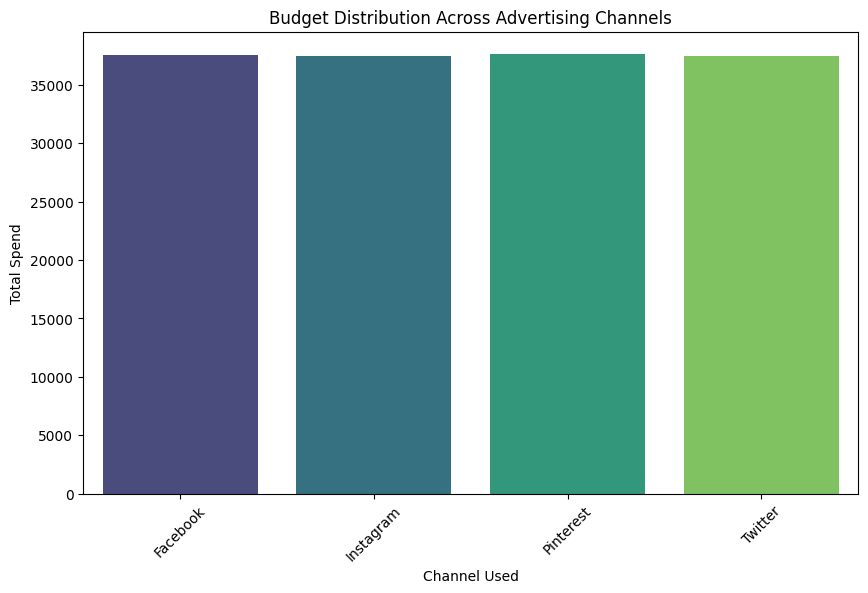

C:\Users\milto\AppData\Local\Temp\ipykernel_5544\125706452.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance_summary, x='Channel_Used', y='CPA', palette='magma')


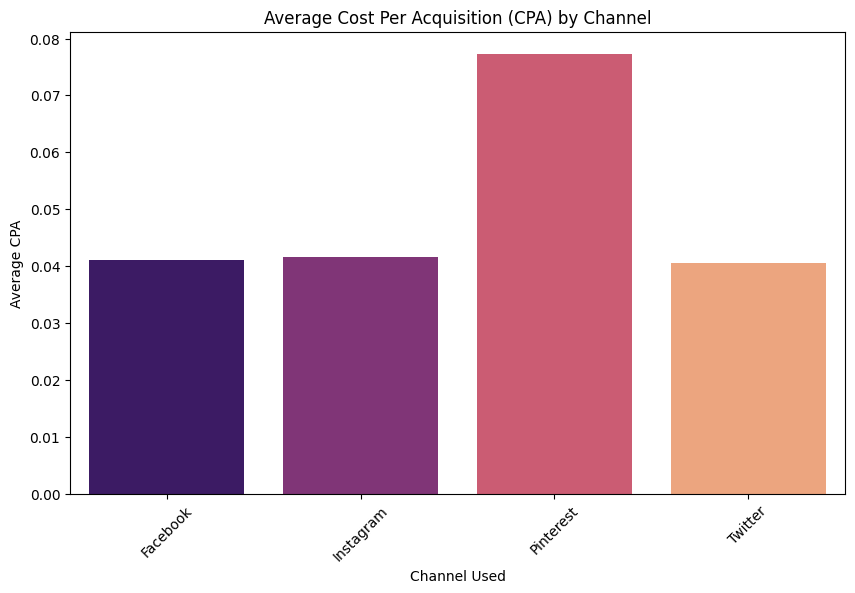

C:\Users\milto\AppData\Local\Temp\ipykernel_5544\125706452.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_performance_summary, x='Channel_Used', y='ROAS', palette='Blues')


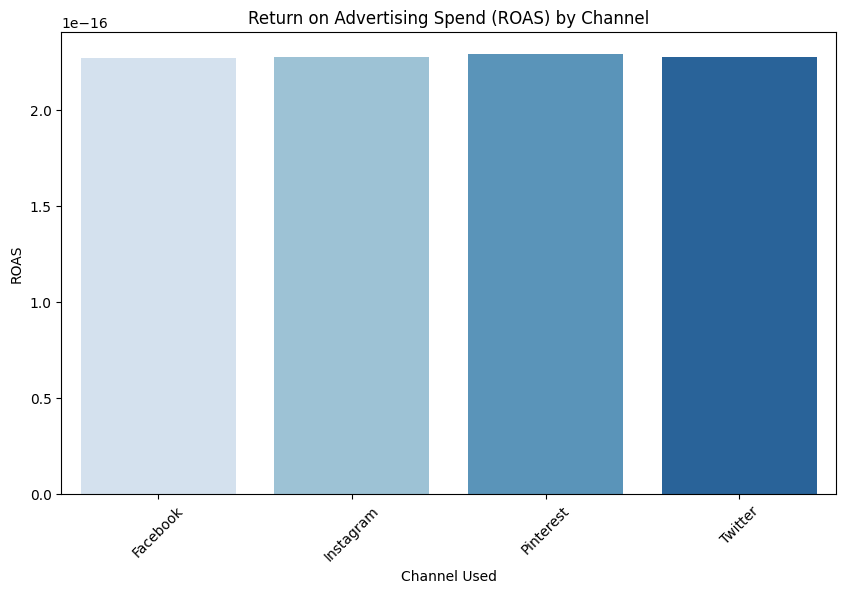

C:\Users\milto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


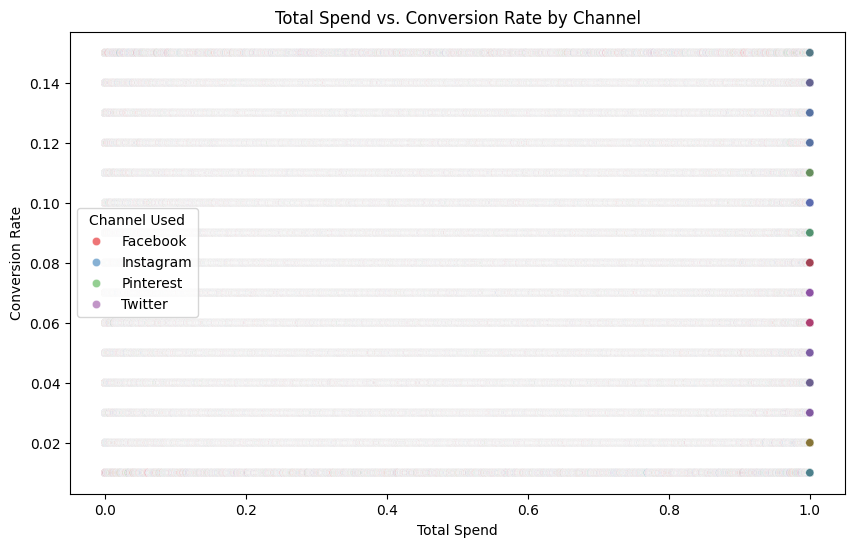

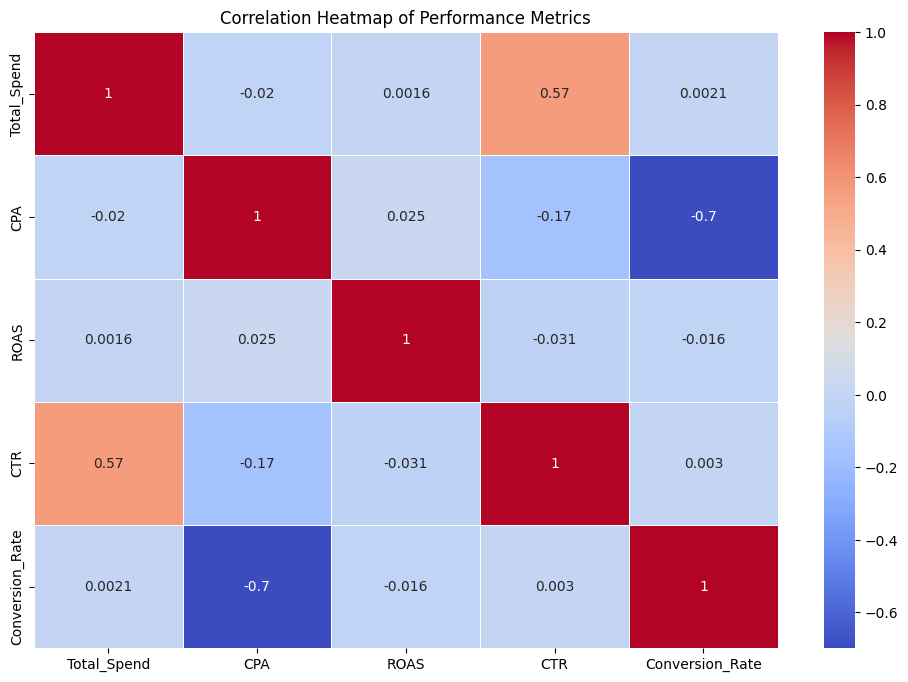

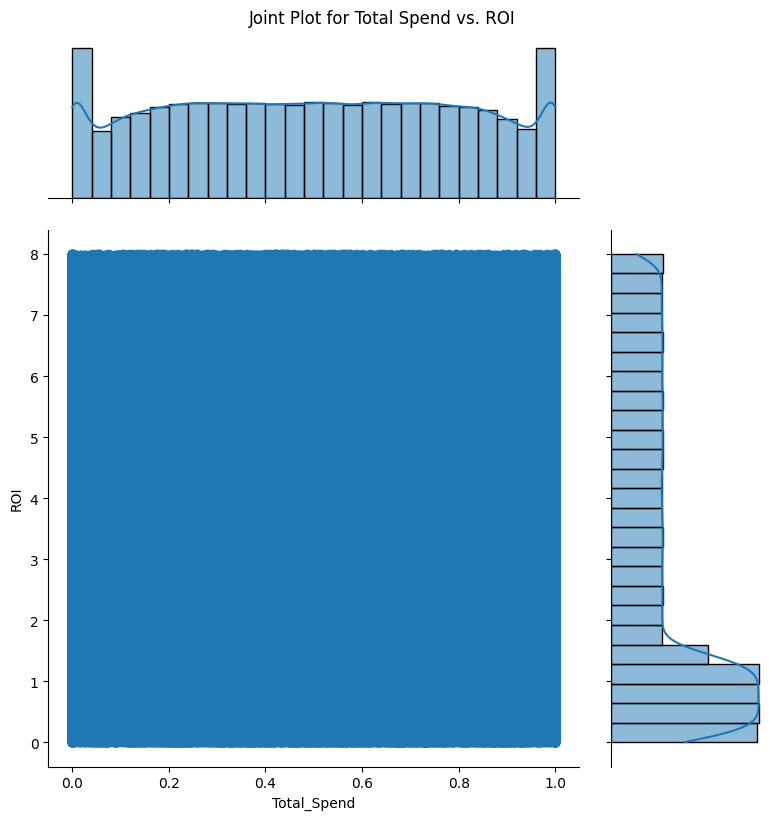

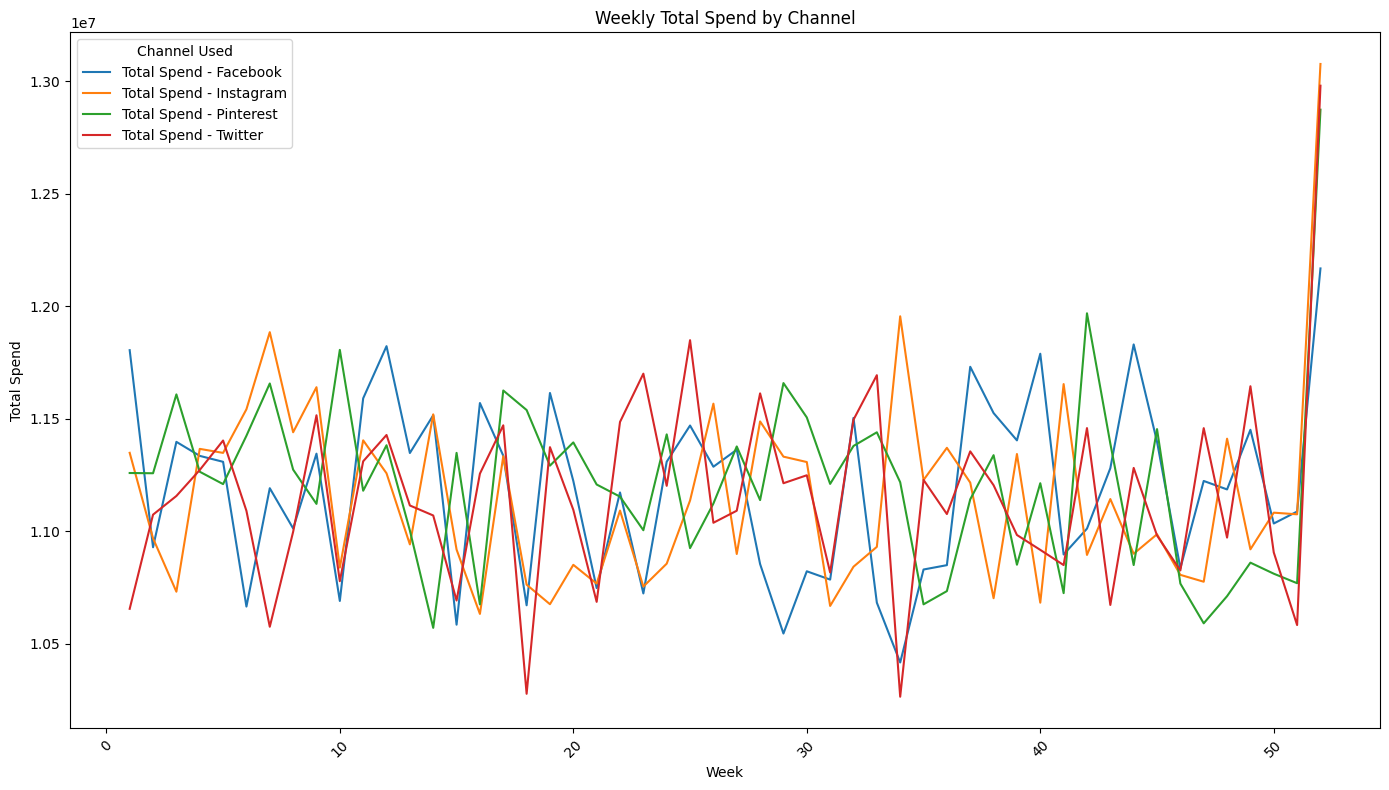

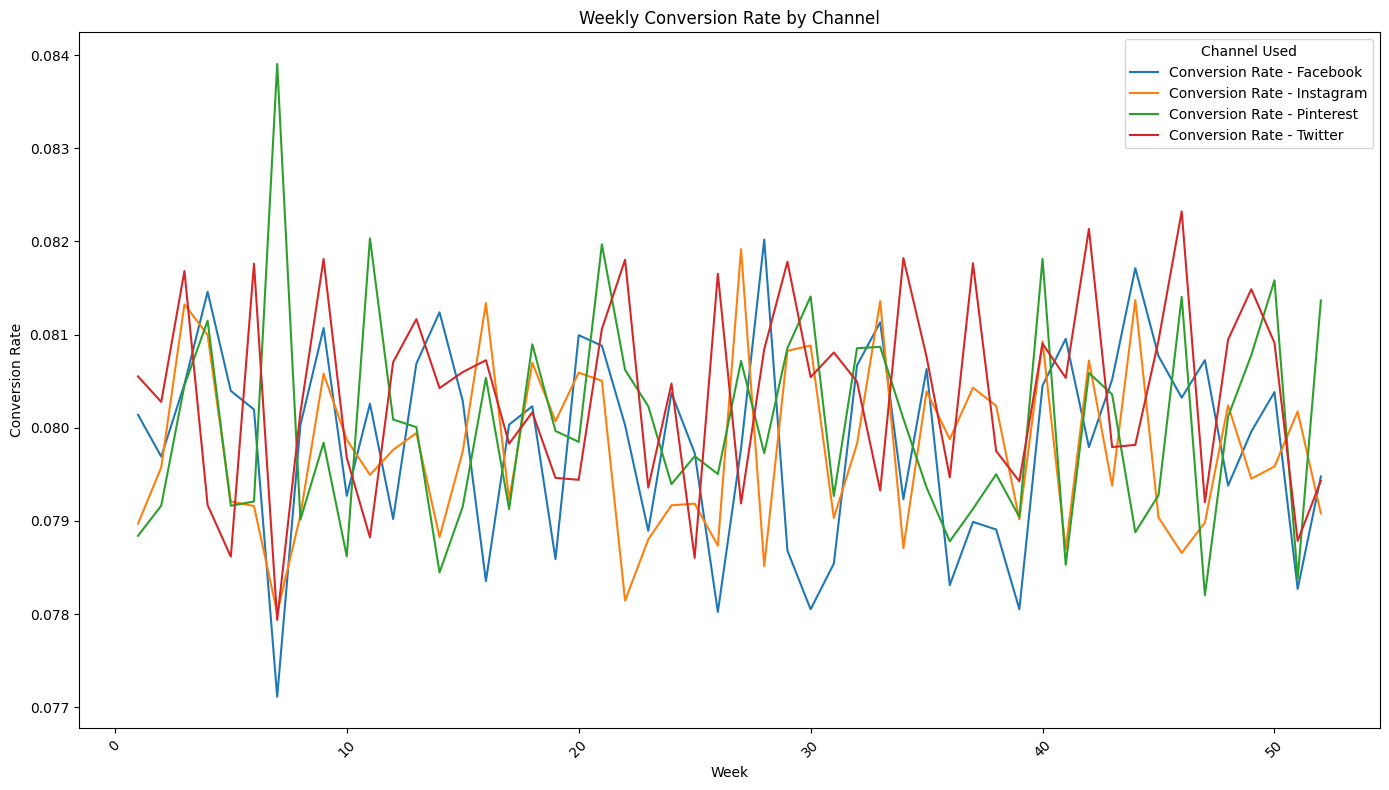

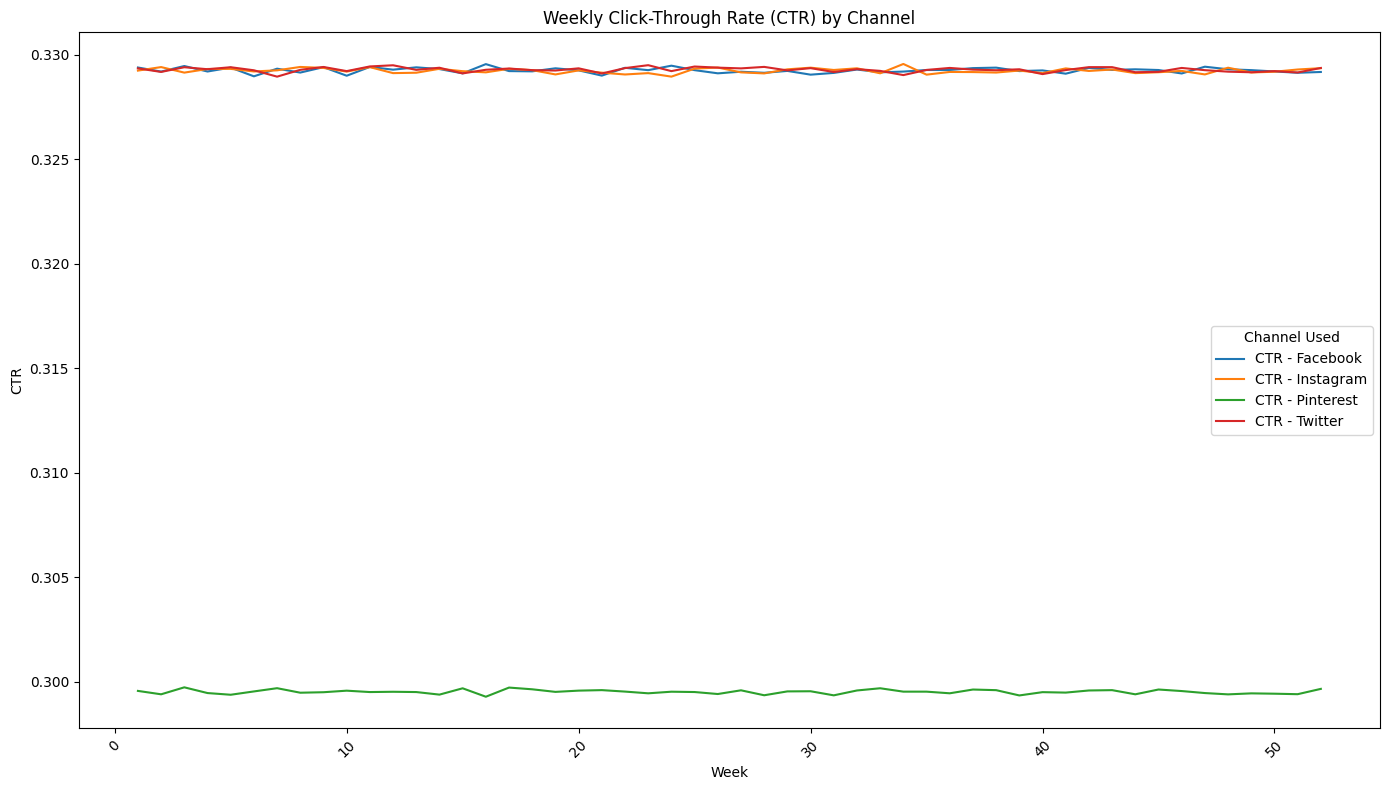

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_encoded is the dataset prepared in the previous steps, with necessary feature engineering
# If df_encoded is not available, use the cleaned and feature-engineered dataset df from previous steps

# Step 3.1: Analyze Channel Performance
# -------------------------------------

# Summary Statistics for Key Metrics
channel_performance_summary = df.groupby('Channel_Used').agg({
    'Total_Spend': 'sum',
    'CPA': 'mean',
    'ROAS': 'mean',
    'CTR': 'mean',
    'Conversion_Rate': 'mean'
}).reset_index()

print("\n--- Channel Performance Summary ---")
print(channel_performance_summary)

# Bar Chart for Budget Distribution Across Channels
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_performance_summary, x='Channel_Used', y='Total_Spend', palette='viridis')
plt.title('Budget Distribution Across Advertising Channels')
plt.xlabel('Channel Used')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Average CPA by Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_performance_summary, x='Channel_Used', y='CPA', palette='magma')
plt.title('Average Cost Per Acquisition (CPA) by Channel')
plt.xlabel('Channel Used')
plt.ylabel('Average CPA')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for ROAS by Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_performance_summary, x='Channel_Used', y='ROAS', palette='Blues')
plt.title('Return on Advertising Spend (ROAS) by Channel')
plt.xlabel('Channel Used')
plt.ylabel('ROAS')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot for Spend vs. Conversion Rate by Channel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Spend', y='Conversion_Rate', hue='Channel_Used', palette='Set1', alpha=0.6)
plt.title('Total Spend vs. Conversion Rate by Channel')
plt.xlabel('Total Spend')
plt.ylabel('Conversion Rate')
plt.legend(title='Channel Used')
plt.show()

# Heatmap for Correlation Analysis of Performance Metrics
plt.figure(figsize=(12, 8))
metrics_df = df[['Total_Spend', 'CPA', 'ROAS', 'CTR', 'Conversion_Rate']]
corr_matrix = metrics_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Performance Metrics')
plt.show()

# Step 3.2: Visualize Relationships
# ---------------------------------

# Joint Plot for Spend vs. ROI
sns.jointplot(data=df, x='Total_Spend', y='ROI', kind='reg', height=8, ratio=3, marginal_kws=dict(bins=25, fill=True))
plt.suptitle('Joint Plot for Total Spend vs. ROI', y=1.02)
plt.show()

# Line Plot for Trends: Channel Performance Over Time
# Assuming we have the aggregated weekly data: 'weekly_channel_summary'
# Line plot to visualize trends in spend, impressions, and clicks for each channel over time
plt.figure(figsize=(14, 8))
for channel in weekly_channel_summary['Channel_Used'].unique():
    channel_data = weekly_channel_summary[weekly_channel_summary['Channel_Used'] == channel]
    plt.plot(channel_data['Week'], channel_data['Total_Spend'], label=f'Total Spend - {channel}')

plt.title('Weekly Total Spend by Channel')
plt.xlabel('Week')
plt.ylabel('Total Spend')
plt.legend(title='Channel Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Plot for Conversion Rate Trends Over Time
plt.figure(figsize=(14, 8))
for channel in weekly_channel_summary['Channel_Used'].unique():
    channel_data = weekly_channel_summary[weekly_channel_summary['Channel_Used'] == channel]
    plt.plot(channel_data['Week'], channel_data['Conversion_Rate'], label=f'Conversion Rate - {channel}')

plt.title('Weekly Conversion Rate by Channel')
plt.xlabel('Week')
plt.ylabel('Conversion Rate')
plt.legend(title='Channel Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Plot for Click-Through Rate (CTR) Trends Over Time
weekly_channel_summary['CTR'] = weekly_channel_summary['Clicks'] / weekly_channel_summary['Impressions']
plt.figure(figsize=(14, 8))
for channel in weekly_channel_summary['Channel_Used'].unique():
    channel_data = weekly_channel_summary[weekly_channel_summary['Channel_Used'] == channel]
    plt.plot(channel_data['Week'], channel_data['CTR'], label=f'CTR - {channel}')

plt.title('Weekly Click-Through Rate (CTR) by Channel')
plt.xlabel('Week')
plt.ylabel('CTR')
plt.legend(title='Channel Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Defining the Optimization Problem

In [37]:
import numpy as np
from scipy.optimize import minimize

# Example Parameters
channels = ['Facebook', 'Instagram', 'Twitter', 'Pinterest']
num_channels = len(channels)
total_budget = 100000  # Total available budget in dollars

# Define minimum and maximum budget for each channel
min_budget = [5000, 5000, 3000, 4000]  # Minimum budget for each channel
max_budget = [50000, 50000, 30000, 40000]  # Maximum budget for each channel

# Predicted ROI function (example)
# Assuming a simple quadratic relationship between budget and ROI for each channel
def predicted_roi(channel_idx, budget):
    # Example coefficients for simplicity: a simple quadratic model f(b) = a * b^2 + b
    a = [-0.00001, -0.00002, -0.000015, -0.00001]  # Coefficients for quadratic term
    b = 1  # Coefficient for linear term (for simplicity, we assume it's the same for all)
    return a[channel_idx] * budget**2 + b * budget

# Objective function to maximize total ROI (we'll minimize the negative ROI)
def objective(budgets):
    total_roi = 0
    for i in range(num_channels):
        total_roi += predicted_roi(i, budgets[i])
    return -total_roi  # Negative sign because we want to maximize ROI

# Constraints
constraints = []

# Total budget constraint
constraints.append({
    'type': 'ineq',  # Means the function must be >= 0
    'fun': lambda b: total_budget - np.sum(b)  # total_budget - sum(budgets) >= 0
})

# Minimum and maximum budget constraints for each channel
bounds = [(min_budget[i], max_budget[i]) for i in range(num_channels)]

# Initial guess for budgets (evenly distributed as a starting point)
initial_guess = [total_budget / num_channels] * num_channels

# Solve the optimization problem
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract the optimized budget allocation
if result.success:
    optimized_budgets = result.x
    print("\nOptimized Budget Allocation:")
    for i, budget in enumerate(optimized_budgets):
        print(f"{channels[i]}: ${budget:.2f}")
    print(f"\nTotal ROI: {-result.fun:.2f}")
else:
    print("Optimization failed:", result.message)



Optimized Budget Allocation:
Facebook: $31568.17
Instagram: $15800.32
Twitter: $21039.91
Pinterest: $31591.60

Total ROI: 68421.05


In [ ]:
# Model Selection and Training

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is the cleaned and feature-engineered dataset
# Step 1: Prepare the Features and Target
# Features: all numeric columns that relate to ad spend, clicks, impressions, etc.
# Target: ROI (or you can use revenue as an alternative target)

# Defining features and target
X = df[['Total_Spend', 'Impressions', 'Clicks', 'Engagement_Score']]  # Add other relevant features as necessary
y = df['ROI']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Step 3: Predict and Evaluate
y_pred = linear_regressor.predict(X_test)
print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")



Linear Regression Model Performance:
Mean Squared Error: 4.30
R^2 Score: 0.29



Random Forest Regressor Model Performance:
Mean Squared Error: 5.35
R^2 Score: 0.11


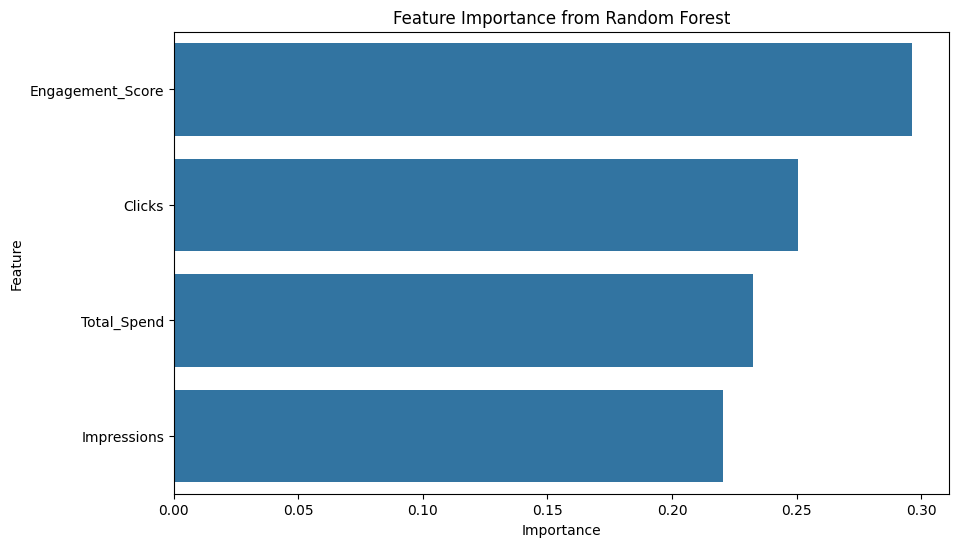

In [41]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_regressor.predict(X_test)
print("\nRandom Forest Regressor Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")

# Feature Importance Analysis
feature_importance = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [43]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_regressor.predict(X_test)
print("\nXGBoost Regressor Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb):.2f}")


XGBoost Regressor Model Performance:
Mean Squared Error: 4.05
R^2 Score: 0.33


In [47]:
!pip install deap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
      --------------------------------------- 0.0/1.1 MB 330.3 kB/s eta 0:00:04
     - -------------------------------------- 0.0/1.1 MB 487.6 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.1 MB 544.7 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.1 MB 544.7 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.1 MB 544.7 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.1 MB 544.7 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.1 MB 261.7 kB/s eta 0:00:04
     ---- ----------------------------------- 0.1/1.1 MB 327.2 kB/s eta 0:00:03
     ---- ----------------------------------- 0.1/1.1 MB 327.2 kB/s eta 0:00:03
     ------- -------------------------------- 0.2/1.1 MB 461.0 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.1 MB 461.0 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3

In [49]:
from deap import base, creator, tools, algorithms
import random

# Define the problem as a maximization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 5000, 50000)  # Example range for budgets per channel
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=num_channels)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function to calculate total predicted ROI
def evaluate(individual):
    total_roi = sum([predicted_roi(i, individual[i]) for i in range(num_channels)])
    return total_roi,

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5000, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Population
population = toolbox.population(n=50)

# Genetic Algorithm Execution
num_generations = 10
for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Best solution found
best_individual = tools.selBest(population, k=1)[0]
print("\nBest Budget Allocation (GA):")
for i, budget in enumerate(best_individual):
    print(f"{channels[i]}: ${budget:.2f}")



Best Budget Allocation (GA):
Facebook: $53049.36
Instagram: $23768.42
Twitter: $29719.71
Pinterest: $49811.68


In [ ]:
# Prepare Data for Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your prepared and feature-engineered DataFrame
# Step 1: Prepare Features and Target
features = ['Total_Spend', 'Clicks', 'Impressions', 'Conversion_Rate', 'Engagement_Score', 'CTR', 'CPA']
target = 'ROI'

X = df[features]
y = df[target]

# Step 2: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed.")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Step 4: Cross-Validation Setup
# Choose a model, for example, Random Forest Regressor or Linear Regression

# Example 1: Linear Regression
lr_model = LinearRegression()

# Perform k-fold cross-validation (k=5) on the training data
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nLinear Regression Cross-Validation R2 Scores: {cv_scores_lr}")
print(f"Mean R2 Score for Linear Regression: {np.mean(cv_scores_lr)}")

# Example 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform k-fold cross-validation (k=5) on the training data
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nRandom Forest Cross-Validation R2 Scores: {cv_scores_rf}")
print(f"Mean R2 Score for Random Forest: {np.mean(cv_scores_rf)}")

# Step 5: Train Models on the Entire Training Set (After Cross-Validation)
# Train the Random Forest Regressor as an example
rf_model.fit(X_train, y_train)

# Step 6: Evaluate Model on Test Data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")


In [ ]:
# Model Evaluation

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test is your actual target values and y_pred is from your respective models

# Example for XGBoost Model Evaluation
print("\n--- Model Evaluation Metrics for XGBoost ---")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


--- Model Evaluation Metrics for XGBoost ---
Mean Absolute Error (MAE): 1.67
Mean Squared Error (MSE): 4.30
R² Score: 0.29


In [ ]:
# Budget Optimization

In [61]:
# Step 1: Train the Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your complete dataset, and you have a list of features defined as 'features'
X = df[features]
y = df['ROI']  # Replace 'ROI' with the column that you are trying to predict

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the model to ensure it's trained properly
y_pred = rf_clf.predict(X_test)
print("Random Forest Regressor Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")


Random Forest Regressor Performance:
Mean Squared Error: 4.85
R^2 Score: 0.20


In [63]:
# Step 2: Use the Trained Model in the Optimization

import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Define the channels and number of channels
channels = ['Facebook', 'Instagram', 'Twitter', 'LinkedIn']
num_channels = len(channels)

# Define the total budget
total_budget = 100000  # Example: $100,000

# Minimum budget per channel
min_budget = 5000

# Ensure the trained model is defined here
# Assuming the RandomForestRegressor is trained and available as rf_clf

# Define the features used during training for creating prediction scenarios
features = ['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score']

# Define the objective function that takes a budget allocation and returns negative ROI
def objective_function(budget_allocation):
    # Create a DataFrame with a budget scenario
    scenario_df = pd.DataFrame({
        'Clicks': [1000, 2000, 1500, 1200],  # Placeholder values, replace with estimated clicks
        'Conversion_Rate': [0.08, 0.07, 0.06, 0.05],  # Placeholder values
        'Acquisition_Cost': budget_allocation,
        'Impressions': [10000, 20000, 15000, 12000],  # Placeholder values
        'Engagement_Score': [7, 8, 6, 5]  # Placeholder values
    })

    # Predict the ROI using the trained model
    predicted_roi = rf_clf.predict(scenario_df[features])
    
    # The objective is to maximize ROI, hence return the negative of the sum of predicted ROI
    return -np.sum(predicted_roi)

# Set initial guess for the budget allocation
initial_guess = [total_budget / num_channels] * num_channels

# Define the constraints
constraints = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - total_budget},  # Total budget constraint
    {'type': 'ineq', 'fun': lambda x: x - min_budget}  # Minimum budget per channel
)

# Define bounds for each budget allocation (each budget should be non-negative)
bounds = [(min_budget, total_budget) for _ in range(num_channels)]

# Run the optimization
result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

# Output the optimal budget allocation
if result.success:
    optimal_budgets = result.x
    print("\nOptimal Budget Allocation (Scipy):")
    for i, budget in enumerate(optimal_budgets):
        print(f"{channels[i]}: ${budget:.2f}")
else:
    print("Optimization failed:", result.message)



Optimal Budget Allocation (Scipy):
Facebook: $25000.00
Instagram: $25000.00
Twitter: $25000.00
LinkedIn: $25000.00


In [65]:
# Simulation and Sensitivity Analysis

# Generate different budget allocation scenarios for simulation
scenarios = [
    [20000, 30000, 25000, 25000],  # Example scenario 1
    [25000, 25000, 25000, 25000],  # Example scenario 2 (equal split)
    [10000, 40000, 30000, 20000],  # Example scenario 3
    [5000, 45000, 35000, 15000],   # Example scenario 4
]

for i, budget_allocation in enumerate(scenarios):
    roi = -objective_function(budget_allocation)
    print(f"Scenario {i + 1} - Budget Allocation: {budget_allocation} - Predicted ROI: ${roi:.2f}")


Scenario 1 - Budget Allocation: [20000, 30000, 25000, 25000] - Predicted ROI: $17.07
Scenario 2 - Budget Allocation: [25000, 25000, 25000, 25000] - Predicted ROI: $17.07
Scenario 3 - Budget Allocation: [10000, 40000, 30000, 20000] - Predicted ROI: $17.07
Scenario 4 - Budget Allocation: [5000, 45000, 35000, 15000] - Predicted ROI: $17.07


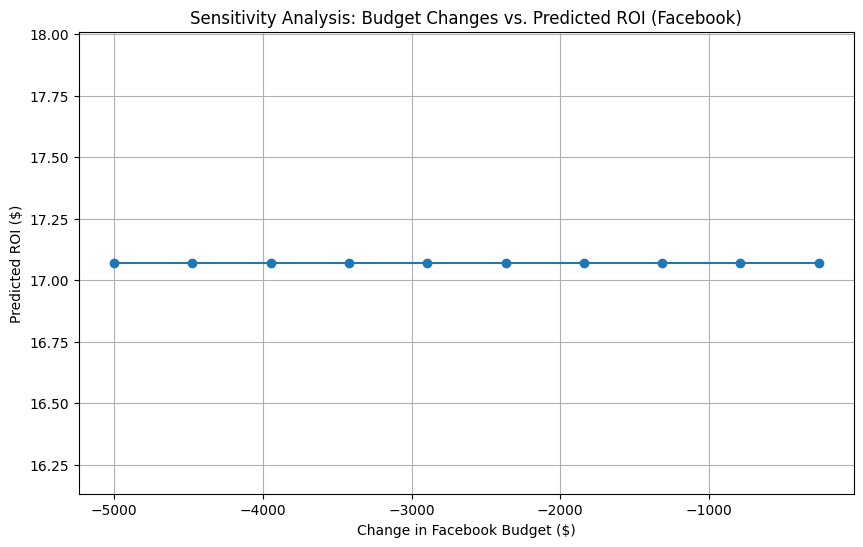

In [67]:
import matplotlib.pyplot as plt

# Select one scenario and vary the budget for sensitivity analysis
scenario = initial_guess.copy()  # Start with an equal budget allocation
sensitivity_results = []

for delta in np.linspace(-5000, 5000, 20):  # Increase or decrease budget by $5000 in steps
    modified_scenario = scenario.copy()
    modified_scenario[0] += delta  # Modify budget for the first channel (Facebook)
    if np.sum(modified_scenario) <= total_budget:  # Ensure total budget is still valid
        roi = -objective_function(modified_scenario)
        sensitivity_results.append((delta, roi))

# Plot the sensitivity analysis results
deltas, rois = zip(*sensitivity_results)
plt.figure(figsize=(10, 6))
plt.plot(deltas, rois, marker='o', linestyle='-')
plt.title('Sensitivity Analysis: Budget Changes vs. Predicted ROI (Facebook)')
plt.xlabel('Change in Facebook Budget ($)')
plt.ylabel('Predicted ROI ($)')
plt.grid(True)
plt.show()
